In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
poll = pd.read_csv('poll.csv')

In [3]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [4]:
poll.vote.value_counts()

Brown    511
Green    489
Name: vote, dtype: int64

In [7]:
poll.vote.value_counts(normalize=True) * 100

Brown    51.1
Green    48.9
Name: vote, dtype: float64

In [28]:
def sample(brown, n = 1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [29]:
s = sample(0.51)

In [33]:
s

,vote
0,Green
1,Brown
2,Green
3,Green
4,Brown
...,...
995,Brown
996,Green
997,Green
998,Green


In [31]:
dist = pd.DataFrame([sample(0.51).vote.value_counts() for _ in range(1000)])

In [32]:
dist.head()

,Green,Brown
vote,506,494
vote,516,484
vote,511,489
vote,487,513
vote,477,523


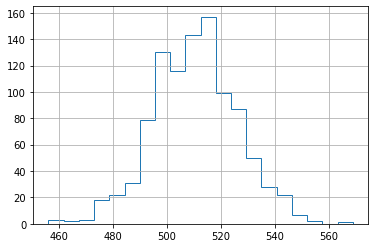

In [34]:
dist.Brown.hist(histtype='step', bins=20)

In [40]:
def samplinglist(brown, n=1000):
    return pd.DataFrame([sample(brown).vote.value_counts() for _ in range(n)])

In [41]:
def quantiles(brown):
    dist = samplinglist(brown)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [42]:
for i in range(48, 54):
    r = i/100
    print(r, quantiles(r))

0.48 (450.0, 510.025)
0.49 (461.0, 522.0)
0.5 (469.0, 531.0)
0.51 (480.0, 539.0)
0.52 (488.0, 552.0)
0.53 (500.0, 561.0)


In [43]:
dist =  samplinglist(0.5, 10000)

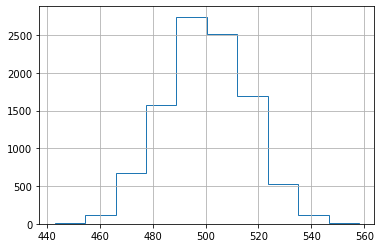

In [44]:
dist.Brown.hist(histtype='step')

In [45]:
largepoll = pd.read_csv('poll-larger.csv')

In [47]:
largepoll.vote.value_counts()

Green    5181
Brown    4819
Name: vote, dtype: int64